# Importing libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LDA
from scipy.linalg import eigh
from scipy.linalg import eig

# Naive bayes
from scipy.stats import norm
import random

# KNN
from sklearn.neighbors import KNeighborsClassifier

# CNN
## Tf.keras version
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils
from tensorflow.keras.utils import to_categorical, plot_model

### For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading data

In [141]:
file_path_train = 'fashion_train.npy'
train = np.load(file_path_train)
file_path_test = 'fashion_test.npy'
test = np.load(file_path_test)

# Output the loaded data and its shape
print("Loaded Data:")
print(train[:5])
print("Shape of the train data:", train.shape)
print(test[:5])
print("Shape of the test data:", test.shape)

Loaded Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 4]]
Shape of the train data: (10000, 785)
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]
Shape of the test data: (5000, 785)


# Data exploration

In [142]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Shirt']

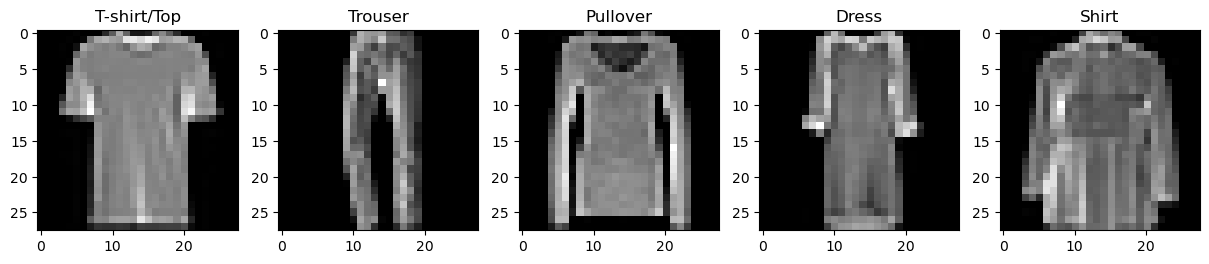

In [143]:
# Get unique types present in the last column
unique_types = np.unique(train[:, -1])

# Set up subplots
fig, axs = plt.subplots(1, len(unique_types), figsize=(15, 3))

# Visualize one image of each type in one row
for i, picture_type in enumerate(unique_types):
    # Select the first row of the current type
    type_data = train[train[:, -1] == picture_type]
    sample_image = type_data[0, :-1].reshape(28, 28)  # Extract the image and reshape it

    # Plot the image in the i-th subplot
    axs[i].imshow(sample_image, cmap='gray')
    axs[i].set_title(classes[i])

# Show the plot
plt.show()

## Distribution of clothing classes/categories

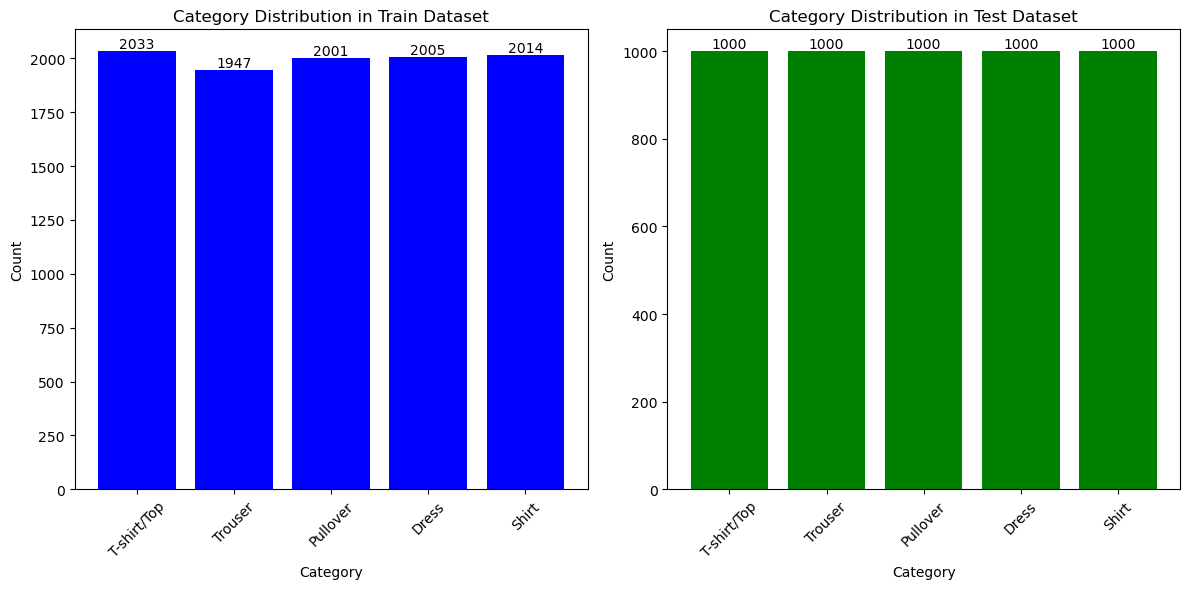

In [144]:
# Count the occurrences of each category in the last column of the train data
train_counts = np.unique(train[:, -1], return_counts=True)
test_counts = np.unique(test[:, -1], return_counts=True)

# Convert category indices to class names
train_category_counts = (classes, train_counts[1])
test_category_counts = (classes, test_counts[1])

# Plotting
plt.figure(figsize=(12, 6))

# Function to add text labels above bars
def add_labels(ax, categories, counts):
    for i, count in enumerate(counts):
        ax.text(i, count, str(count), ha='center', va='bottom')

# Plot for the train dataset
ax1 = plt.subplot(1, 2, 1)
ax1.bar(train_category_counts[0], train_category_counts[1], color='blue')
add_labels(ax1, train_category_counts[0], train_category_counts[1])
plt.title('Category Distribution in Train Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for the test dataset
ax2 = plt.subplot(1, 2, 2)
ax2.bar(test_category_counts[0], test_category_counts[1], color='green')
add_labels(ax2, test_category_counts[0], test_category_counts[1])
plt.title('Category Distribution in Test Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Reshaping images

In [145]:
# Split the data into pixels and classes
pixels_train = train[:, :-1]  # Extracting all columns except the last one
labels_train = train[:, -1]   # Extract only the last column for labels
pixels_test = test[:, :-1]  # Extracting all columns except the last one
labels_test = test[:, -1]   # Extract only the last column for labels

num_classes = 5
# Reshape the pixels to image layout (number of examples, height, width, channels)
train_images = pixels_train.reshape(-1, 28, 28, 1)
test_images = pixels_test.reshape(-1, 28, 28, 1)

# One-hot encoding classes
train_labels = to_categorical(labels_train, num_classes=num_classes)
test_labels = to_categorical(labels_test, num_classes=num_classes)

# Dimensionality reduction

## Principal component analysis (PCA)

### PCA using Standard Scaler

Standard scaler removes the mean and scales each feature/variable to unit variance. It scales the data to have a mean of 0 and a standard deviation of 1.

In [146]:
# Standardize the data
scaler = StandardScaler() #  removes the mean and scales each feature/variable to unit variance
scaler.fit(pixels_train)
pixels_train_scaled = scaler.transform(pixels_train)
pixels_test_scaled = scaler.transform(pixels_test)

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(pixels_train_scaled)
X_pca_test = pca.transform(pixels_test_scaled)

pca_explained_variance_ratio_train = pca.explained_variance_ratio_
# print(pca_explained_variance_ratio_train)

pca_singular_values_train = pca.singular_values_
# print(pca_singular_values_train)

pca_explained_variance_ratio_test = pca.explained_variance_ratio_
# print(pca_explained_variance_ratio_test)

pca_singular_values_test = pca.singular_values_
# print(pca_singular_values_test)


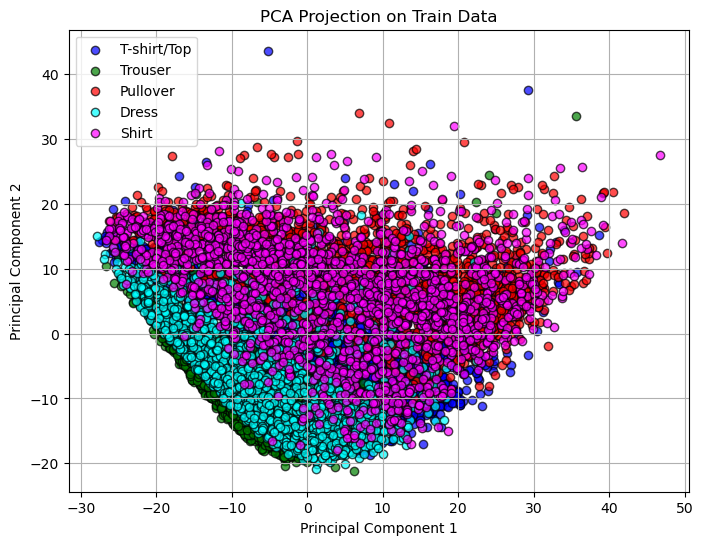

In [147]:
# Plotting the PCA transformed train data
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class
for i, class_name in enumerate(classes):
    plt.scatter(X_pca_train[labels_train == i, 0], X_pca_train[labels_train == i, 1], alpha=0.7, color = colors[i], label=class_name, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection on Train Data')
plt.grid(True)
plt.legend()
plt.show()

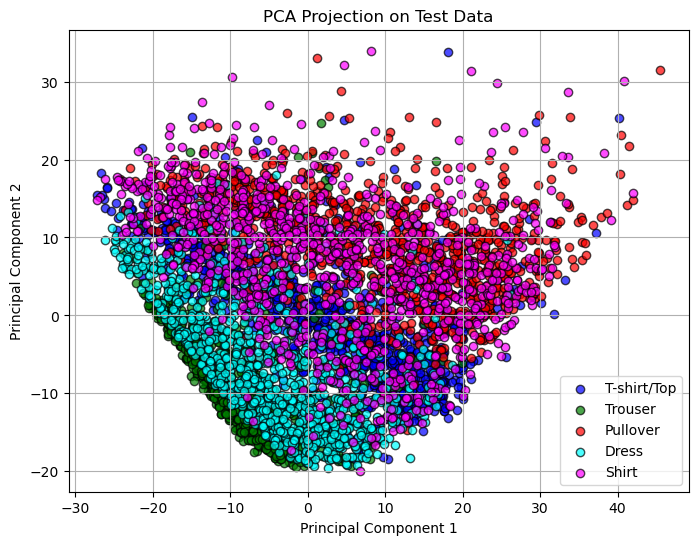

<Figure size 640x480 with 0 Axes>

In [148]:
# Plotting the PCA transformed test data
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class
for i, class_name in enumerate(classes):
    plt.scatter(X_pca_test[labels_test == i, 0], X_pca_test[labels_test == i, 1], alpha=0.7, color = colors[i], label=class_name, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection on Test Data')
plt.grid(True)
plt.legend() 
plt.show()
plt.savefig('PCA_test-data-standardscaler.png')

### PCA using Minmax Scaler

Minmax scaler scales the data to a fixed range, usually between 0 and 1, which can be useful when the features have different units or different ranges. It preserves the shape of the original distribution.

In [149]:
# Standardize the data
scaler = MinMaxScaler() #  removes the mean and scales each feature/variable to unit variance
scaler.fit(pixels_train)
pixels_train_scaled_mm = scaler.transform(pixels_train)
pixels_test_scaled_mm = scaler.transform(pixels_test)

pca = PCA(n_components=2)
X_pca_train_mm = pca.fit_transform(pixels_train_scaled_mm)
X_pca_test_mm = pca.transform(pixels_test_scaled_mm)

pca_explained_variance_ratio_train_mm = pca.explained_variance_ratio_
# print(pca_explained_variance_ratio_train)

pca_singular_values_train_mm = pca.singular_values_
# print(pca_singular_values_train)

pca_explained_variance_ratio_test_mm = pca.explained_variance_ratio_
# print(pca_explained_variance_ratio_test)

pca_singular_values_test_mm = pca.singular_values_
# print(pca_singular_values_test)

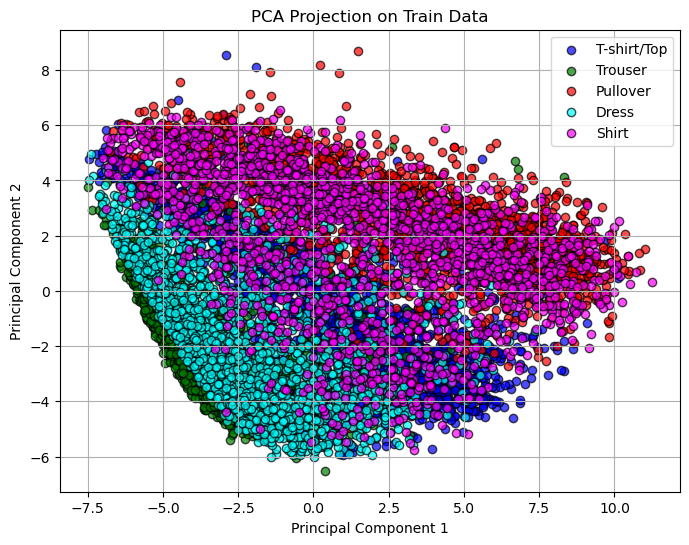

In [150]:
# Plotting the PCA transformed train data
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class
for i, class_name in enumerate(classes):
    plt.scatter(X_pca_train_mm[labels_train == i, 0], X_pca_train_mm[labels_train == i, 1], alpha=0.7, color = colors[i], label=class_name, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection on Train Data')
plt.grid(True)
plt.legend()
plt.show()

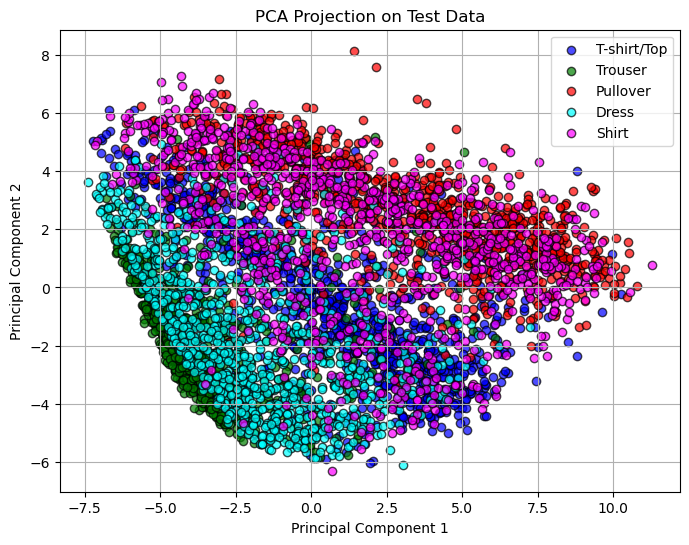

In [151]:
# Plotting the PCA transformed test data
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class
for i, class_name in enumerate(classes):
    plt.scatter(X_pca_test_mm[labels_test == i, 0], X_pca_test_mm[labels_test == i, 1], alpha=0.7, color = colors[i], label=class_name, edgecolors='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection on Test Data')
plt.grid(True)
plt.legend() 
plt.show()

## LDA

### Feature scaling

In [152]:
# Used for LDA

def min_max_scale(data):
    min_values = np.min(data, axis=0)
    max_values = np.max(data, axis=0)

    # Check for zero denominators
    zero_denominator_mask = (max_values - min_values) == 0
    zero_denominator_indices = np.where(zero_denominator_mask)[0]

    # Replace zero denominators with 1 to avoid division by zero
    denominator_values = np.where(zero_denominator_mask, 1, (max_values - min_values))

    scaled_data = (data - min_values) / denominator_values

    return scaled_data


### LDA function

In [153]:
def LDA(X, y, n_components=None, regularization=1e-2):

    # - X: samples, features
    # - y: labels
    # - n_components: number of components to keep (2 in our case)
    # - regularization: 0.01
    # Returns lda components and explained variance ratio

    # Class means
    class_means = np.array([np.mean(X[y == label], axis=0) for label in np.unique(y)])

    # Overall mean
    overall_mean = np.mean(X, axis=0)

    # Within-class scatter matrix (Sw)
    within_class_scatter = sum([np.cov(X[y == label], rowvar=False) for label in np.unique(y)])

    # Add regularization to the diagonal of within-class scatter matrix
    within_class_scatter += regularization * np.eye(X.shape[1])

    # Between-class scatter matrix (Sb)
    between_class_scatter = sum([np.outer((mean - overall_mean), (mean - overall_mean))
                                for mean in class_means])

    # Add regularization to the diagonal of between-class scatter matrix
    between_class_scatter += regularization * np.eye(X.shape[1])

    # Solve the generalized eigenvalue problem for (Sb, Sw)
    eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter)

    # Sort eigenvalues and corresponding eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top n_components eigenvectors
    if n_components is not None:
        eigenvectors = eigenvectors[:, :n_components]

    # Normalize eigenvectors to have unit length
    lda_components = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

    # Calculate explained variance ratio
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    return lda_components, explained_variance_ratio

In [154]:
# Train data

# Scale the pixels for train
pixels_train_scaled_lda = min_max_scale(pixels_train)

# Apply LDA
lda_components_train, explained_variance_ratio_train = LDA(pixels_train_scaled_lda, labels_train, n_components=2)

# Transform the data using the LDA components
X_lda_train = pixels_train_scaled_lda.dot(lda_components_train)

# Test data

# Scale the pixels for test
pixels_test_scaled_lda = min_max_scale(pixels_test)

# Apply LDA
lda_components_test, explained_variance_ratio_test = LDA(pixels_test_scaled_lda, labels_test, n_components=2)

# Transform the data using the LDA components
X_lda_test = pixels_test_scaled_lda.dot(lda_components_test)


In [155]:
# print(lda_components_train)
print(lda_components_test)

[[ 0.          0.        ]
 [-0.01891712  0.03685021]
 [ 0.00988332  0.0270769 ]
 ...
 [ 0.00247833 -0.01523197]
 [-0.00097602  0.00098439]
 [ 0.00246528  0.01959806]]


### Visualize LDA

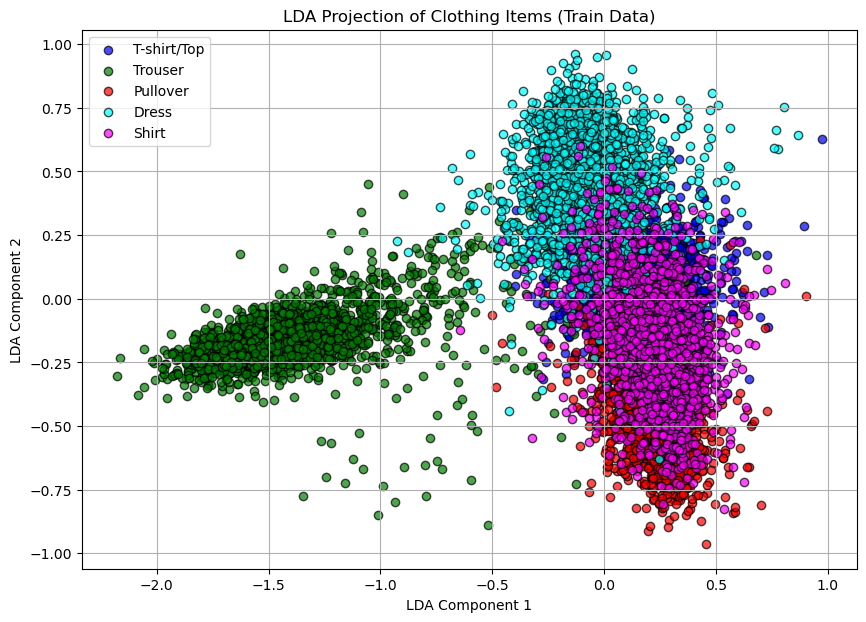

In [156]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class

plt.figure(figsize=(10, 7))
for i, class_name in enumerate(classes):
    plt.scatter(X_lda_train[labels_train == i, 0], X_lda_train[labels_train == i, 1], 
                color=colors[i], label=class_name, edgecolors='black', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Clothing Items (Train Data)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

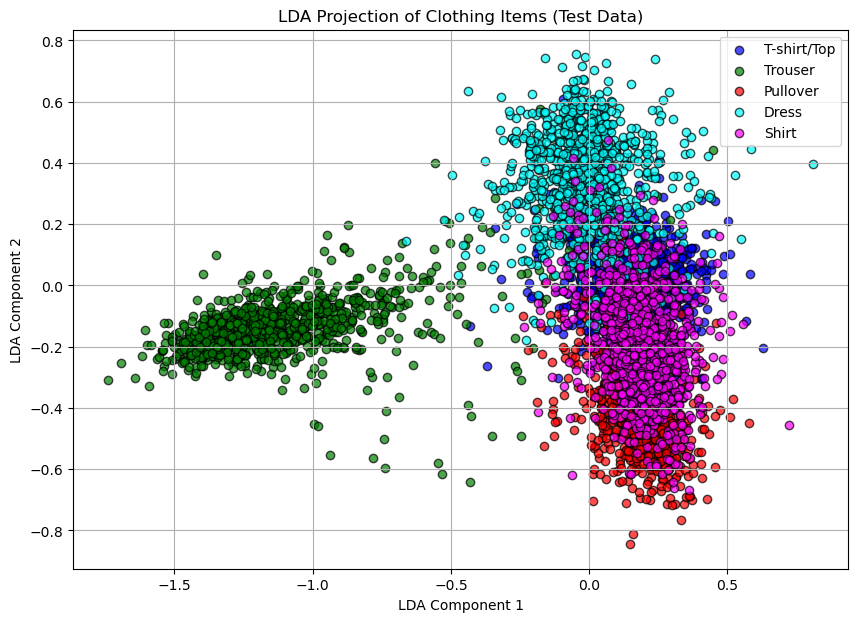

In [157]:
colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # One color for each class

plt.figure(figsize=(10, 7))
for i, class_name in enumerate(classes):
    plt.scatter(X_lda_test[labels_test == i, 0], X_lda_test[labels_test == i, 1], 
                color=colors[i], label=class_name, edgecolors='black', alpha=0.7)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Clothing Items (Test Data)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Classification

### Initiating seed for reproducibility

In [158]:
seed = 8
np.random.seed(seed)
tf.random.set_seed(seed)
random_state = 8

## Naive Bayes (using LDA variables)

In [159]:
# Split the training data by class
class_data_train = {label: X_lda_train[labels_train == label] for label in np.unique(labels_train)}

# Marginal class conditionals using Gaussian kernel density estimation
def kernel_density_estimate(x, data, bandwidth):
    return np.sum(norm.pdf((x - data) / bandwidth)) / (len(data) * bandwidth)

def naive_bayes_classifier(x, class_data, bandwidth):
    probabilities = {}
    for label, data in class_data.items():

        # Prior probability P(Y)
        prior_prob = len(data) / len(X_lda_train)

        # Estimate marginal class conditionals using kernel density estimation
        p_x1_given_y = kernel_density_estimate(x[0], data[:, 0], bandwidth)
        p_x2_given_y = kernel_density_estimate(x[1], data[:, 1], bandwidth)

        # Naive Bayes rule
        posterior_prob = prior_prob * p_x1_given_y * p_x2_given_y
        probabilities[label] = posterior_prob

    # Predict the class with the highest posterior probability
    predicted_class = max(probabilities, key=probabilities.get)
    return predicted_class

# Make predictions
nb_y_pred = [naive_bayes_classifier(x, class_data_train, bandwidth=0.1) for x in X_lda_test]

# Accuracy
nb_accuracy = accuracy_score(labels_test, nb_y_pred)
print("Accuracy:", nb_accuracy)

Accuracy: 0.7464


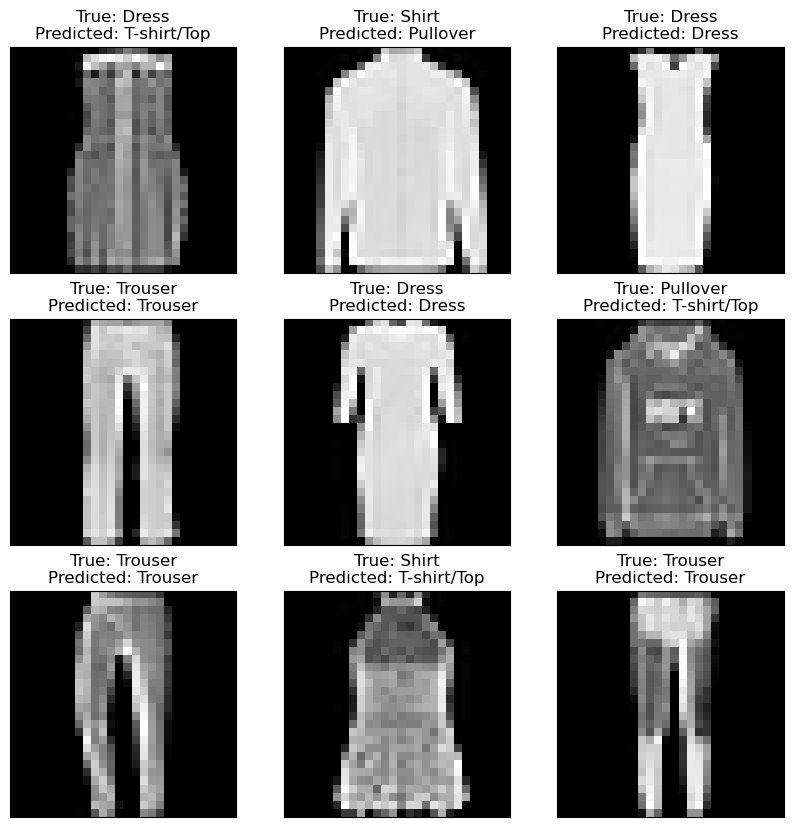

In [160]:
# Randomly select 9 indices from the test data
random_indices = random.sample(range(len(X_lda_test)), 9)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Display the images and print true and predicted classes for a few random examples
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[random_indices[i]], cmap='gray')
    true_class = classes[int(labels_test[random_indices[i]])]
    predicted_class = classes[int(nb_y_pred[random_indices[i]])]
    ax.set_title(f"True: {true_class}\nPredicted: {predicted_class}")
    ax.set_xticks([])
    ax.set_yticks([])

### Naives Bayes: PCA components

In [161]:
# Naive Bayes with PCA components

# Split the training data by class
class_data_train_pca = {label: X_pca_train[labels_train == label] for label in np.unique(labels_train)}

# Make predictions on the test set
pca_y_pred = [naive_bayes_classifier(x, class_data_train_pca, bandwidth=0.1) for x in X_pca_test]

# Accuracy using Naive Byaes with PCA components
nb_accuracy_pca = accuracy_score(labels_test, pca_y_pred)
print("Accuracy:", nb_accuracy_pca)

Accuracy: 0.4816


## KNN

In [162]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (k)
knn_classifier.fit(pixels_train, labels_train)

# Make predictions
knn_y_pred = knn_classifier.predict(pixels_test)

# Accuracy
knn_accuracy = accuracy_score(labels_test, knn_y_pred)
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(classification_report(labels_test, knn_y_pred))

Accuracy: 0.8246
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.85      0.81      1000
           3       0.91      0.88      0.89      1000
           4       0.68      0.59      0.63      1000

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



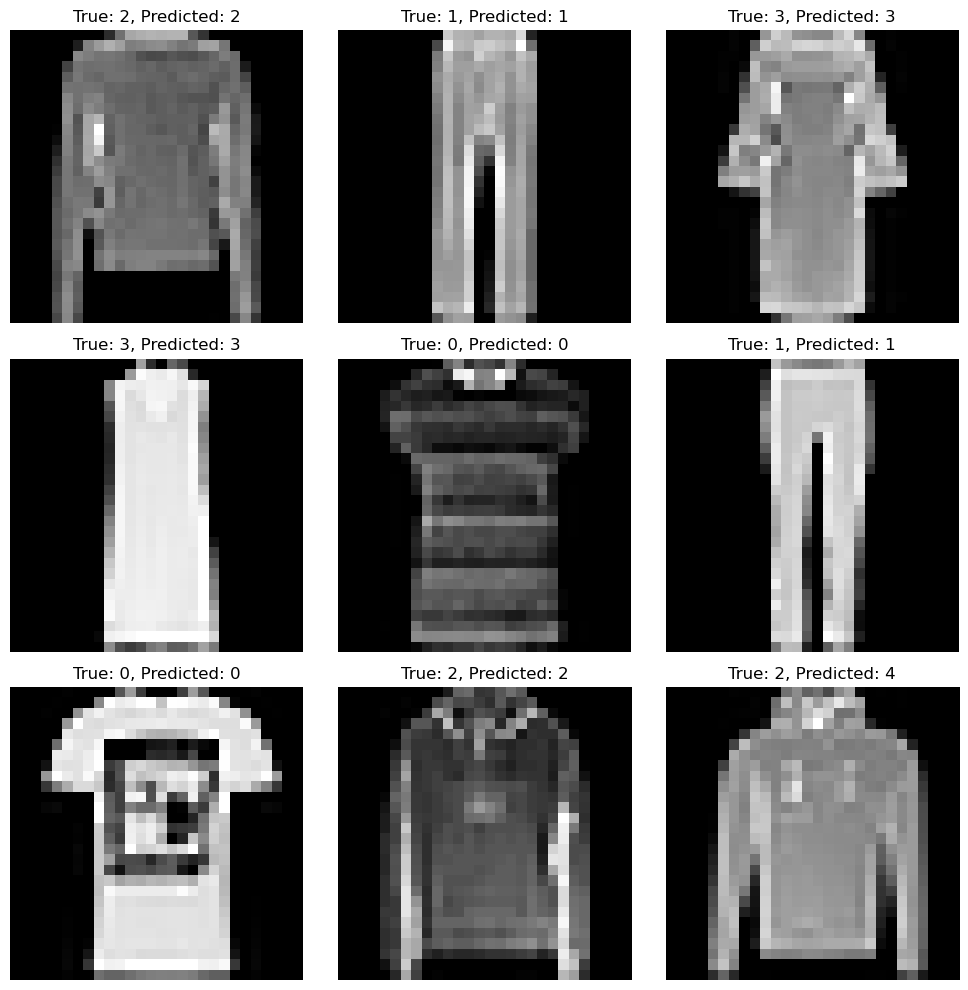

In [163]:
# Visualize a few predictions
# Select a random subset of test samples for visualization
num_samples_to_visualize = 9
random_indices = np.random.choice(len(pixels_test), num_samples_to_visualize, replace=False)
visualize_samples = pixels_test[random_indices]
true_labels = labels_test[random_indices]
predicted_labels = knn_classifier.predict(visualize_samples)

# Visualize the selected samples
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(visualize_samples[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### KNN: PCA components

In [164]:
knn_classifier_pca = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (k)
knn_classifier_pca.fit(X_pca_train, labels_train)

# Make predictions
knn_y_pred_pca = knn_classifier_pca.predict(X_pca_test)

# Accuracy
knn_accuracy_pca = accuracy_score(labels_test, knn_y_pred_pca)
print("Accuracy:", knn_accuracy_pca)


Accuracy: 0.5684


### KNN: LDA variables

In [165]:
# Create and train the KNN classifier with LDA components
knn_classifier_lda = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (k)
knn_classifier_lda.fit(X_lda_train, labels_train)

# Make predictions on the test set using LDA components
knn_y_pred_lda = knn_classifier_lda.predict(X_lda_test)

# Evaluate the accuracy of the KNN classifier with LDA components
knn_accuracy_lda = accuracy_score(labels_test, knn_y_pred_lda)
print("Accuracy:", knn_accuracy_lda)
print("Classification Report:")
print(classification_report(labels_test, knn_y_pred_lda))

Accuracy: 0.7384
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.78      0.76      1000
           3       0.89      0.78      0.83      1000
           4       0.54      0.41      0.46      1000

    accuracy                           0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000



## CNN

### Base model

Epoch 1/15
313/313 [==============================] - 3s 10ms/step - loss: 1.0777 - accuracy: 0.7781 - val_loss: 0.5550 - val_accuracy: 0.7972
Epoch 2/15
313/313 [==============================] - 3s 9ms/step - loss: 0.4012 - accuracy: 0.8518 - val_loss: 0.4518 - val_accuracy: 0.8356
Epoch 3/15
313/313 [==============================] - 3s 10ms/step - loss: 0.3344 - accuracy: 0.8720 - val_loss: 0.4416 - val_accuracy: 0.8418
Epoch 4/15
313/313 [==============================] - 3s 10ms/step - loss: 0.2917 - accuracy: 0.8901 - val_loss: 0.4196 - val_accuracy: 0.8480
Epoch 5/15
313/313 [==============================] - 4s 12ms/step - loss: 0.2530 - accuracy: 0.9049 - val_loss: 0.4809 - val_accuracy: 0.8508
Epoch 6/15
313/313 [==============================] - 3s 11ms/step - loss: 0.2322 - accuracy: 0.9089 - val_loss: 0.4642 - val_accuracy: 0.8502
Epoch 7/15
313/313 [==============================] - 4s 12ms/step - loss: 0.2051 - accuracy: 0.9218 - val_loss: 0.4615 - val_accuracy: 0.8570


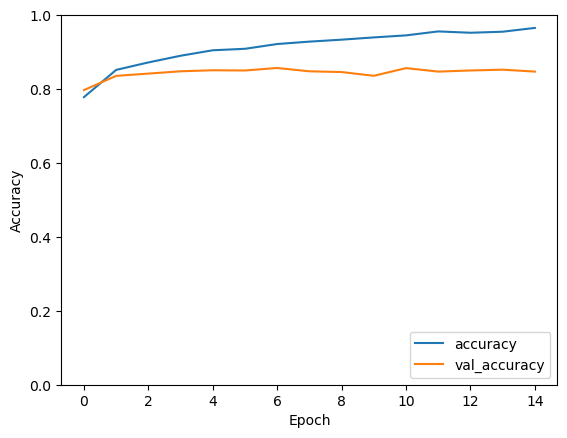

157/157 - 1s - loss: 0.6708 - accuracy: 0.8472 - 601ms/epoch - 4ms/step

Test accuracy: 0.8471999764442444
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 84.72 %

Confusion matrix for test data
------------------------------------------------------------
[[817   4  40  20 119]
 [  5 974   3  15   3]
 [ 34   1 878  12  75]
 [ 25  11  19 922  23]
 [167   2 144  42 645]]


In [166]:
# Constants
num_classes = len(classes)
input_shape = (28, 28, 1)  # Grayscale images, add channel dimension

# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history_base = model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

# Visualize the training process
plt.plot(history_base.history['accuracy'], label='accuracy')
plt.plot(history_base.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_base, test_acc_base = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_base)

# Predict the test set
predictions_base = model.predict(test_images)
predicted_classes_base = np.argmax(predictions_base, axis=1)
true_classes_base = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_base, predicted_classes_base) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_base, predicted_classes_base))


### Base 2 - added batch normalization

Added batch normalization after each convolutional layer. Batch normalization is a technique used in CNN models to improve their performance and training stability. It helps in maintaining a consistent distribution of values in each layer of the network, making it easier for the model to learn and generalize patterns from the data. By normalizing the inputs within each batch, batch normalization reduces the impact of small changes in the input data, making the model more robust and less sensitive to variations in the training data. This leads to faster convergence during training and better overall accuracy of the model.

Epoch 1/15
313/313 [==============================] - 4s 13ms/step - loss: 0.4926 - accuracy: 0.8198 - val_loss: 0.5062 - val_accuracy: 0.8152
Epoch 2/15
313/313 [==============================] - 4s 13ms/step - loss: 0.3221 - accuracy: 0.8762 - val_loss: 0.3641 - val_accuracy: 0.8714
Epoch 3/15
313/313 [==============================] - 4s 13ms/step - loss: 0.2621 - accuracy: 0.8972 - val_loss: 0.3930 - val_accuracy: 0.8554
Epoch 4/15
313/313 [==============================] - 4s 13ms/step - loss: 0.2150 - accuracy: 0.9167 - val_loss: 0.4244 - val_accuracy: 0.8592
Epoch 5/15
313/313 [==============================] - 4s 12ms/step - loss: 0.1806 - accuracy: 0.9285 - val_loss: 0.4310 - val_accuracy: 0.8578
Epoch 6/15
313/313 [==============================] - 4s 13ms/step - loss: 0.1534 - accuracy: 0.9413 - val_loss: 0.4324 - val_accuracy: 0.8686
Epoch 7/15
313/313 [==============================] - 4s 12ms/step - loss: 0.1234 - accuracy: 0.9531 - val_loss: 0.4446 - val_accuracy: 0.8766

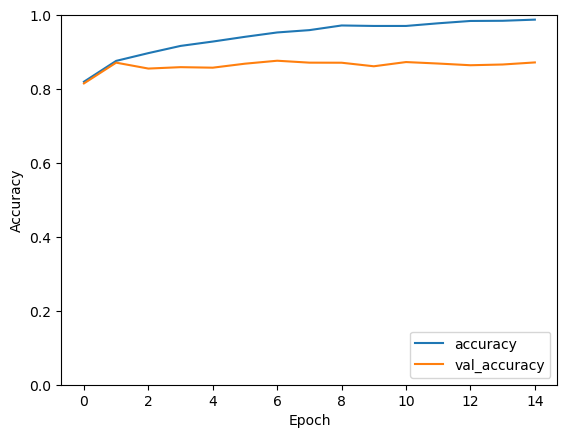

157/157 - 1s - loss: 0.6597 - accuracy: 0.8720 - 807ms/epoch - 5ms/step

Test accuracy: 0.871999979019165
157/157 [==============================] - 1s 5ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 87.2 %

Confusion matrix for test data
------------------------------------------------------------
[[880   1  18  12  89]
 [  5 968   0  20   7]
 [ 39   0 826  18 117]
 [ 26   6   6 934  28]
 [145   1  53  49 752]]


In [167]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history_base2 = model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

# Visualize the training process
plt.plot(history_base2.history['accuracy'], label='accuracy')
plt.plot(history_base2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_base2, test_acc_base2 = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_base2)

# Predict the test set
predictions_base2 = model.predict(test_images)
predicted_classes_base2 = np.argmax(predictions_base2, axis=1)
true_classes_base2 = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_base2, predicted_classes_base2) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_base2, predicted_classes_base2))


### Base 3 - added dropout layers

Added dropout layers after convolutional layers and dense layers. Dropout layers are used to regularize the high-level features learned by the network. For example, a dropout rate of 0.25 would indicate that there is a 25% chance that each neuron's output will be set to zero during training, more complex models or smaller datasets might benefit from a higher dropout rate. Dropout is only active during training. While dropout helps in preventing overfitting, too much dropout can lead to underfitting.

Epoch 1/15
313/313 [==============================] - 5s 15ms/step - loss: 0.7920 - accuracy: 0.7236 - val_loss: 0.4751 - val_accuracy: 0.8262
Epoch 2/15
313/313 [==============================] - 5s 16ms/step - loss: 0.5087 - accuracy: 0.8068 - val_loss: 0.4051 - val_accuracy: 0.8482
Epoch 3/15
313/313 [==============================] - 5s 14ms/step - loss: 0.4444 - accuracy: 0.8338 - val_loss: 0.3933 - val_accuracy: 0.8490
Epoch 4/15
313/313 [==============================] - 5s 14ms/step - loss: 0.4059 - accuracy: 0.8425 - val_loss: 0.3772 - val_accuracy: 0.8564
Epoch 5/15
313/313 [==============================] - 4s 14ms/step - loss: 0.3943 - accuracy: 0.8453 - val_loss: 0.3690 - val_accuracy: 0.8590
Epoch 6/15
313/313 [==============================] - 5s 15ms/step - loss: 0.3684 - accuracy: 0.8557 - val_loss: 0.3732 - val_accuracy: 0.8608
Epoch 7/15
313/313 [==============================] - 4s 14ms/step - loss: 0.3569 - accuracy: 0.8611 - val_loss: 0.3662 - val_accuracy: 0.8648

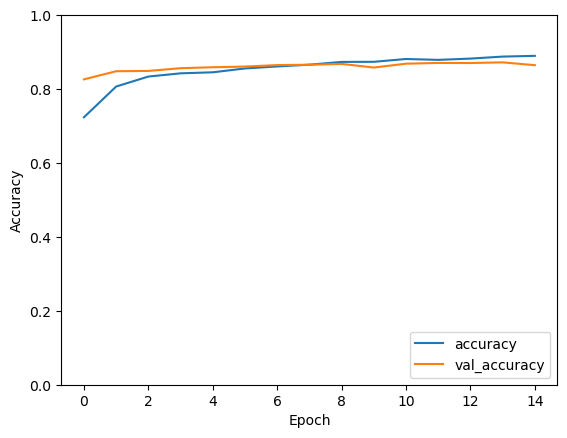

157/157 - 1s - loss: 0.3606 - accuracy: 0.8646 - 594ms/epoch - 4ms/step

Test accuracy: 0.8646000027656555
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 86.46000000000001 %

Confusion matrix for test data
------------------------------------------------------------
[[916   0  26  14  44]
 [  7 973   2  17   1]
 [ 15   0 920  15  50]
 [ 21   3   7 947  22]
 [232   0 157  44 567]]


In [168]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout with 50% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # Again, dropout with 50% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history_base3 = model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

# Visualize the training process
plt.plot(history_base3.history['accuracy'], label='accuracy')
plt.plot(history_base3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_base3, test_acc_base3 = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_base3)

# Predict the test set
predictions_base3 = model.predict(test_images)
predicted_classes_base3 = np.argmax(predictions_base3, axis=1)
true_classes_base3 = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_base3, predicted_classes_base3) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_base3, predicted_classes_base3))


### Base 4 - added 3rd convolutional layer

Experimenting with different sizes of convolutional filters (adding a third layer), as sometimes smaller or larger filters can capture different aspects of the images.

Epoch 1/15
313/313 [==============================] - 5s 13ms/step - loss: 0.9272 - accuracy: 0.6575 - val_loss: 0.5548 - val_accuracy: 0.7922
Epoch 2/15
313/313 [==============================] - 4s 13ms/step - loss: 0.5837 - accuracy: 0.7755 - val_loss: 0.4745 - val_accuracy: 0.8168
Epoch 3/15
313/313 [==============================] - 4s 13ms/step - loss: 0.4942 - accuracy: 0.8200 - val_loss: 0.4581 - val_accuracy: 0.8226
Epoch 4/15
313/313 [==============================] - 4s 12ms/step - loss: 0.4389 - accuracy: 0.8375 - val_loss: 0.4318 - val_accuracy: 0.8356
Epoch 5/15
313/313 [==============================] - 4s 14ms/step - loss: 0.4015 - accuracy: 0.8512 - val_loss: 0.4688 - val_accuracy: 0.8212
Epoch 6/15
313/313 [==============================] - 4s 14ms/step - loss: 0.3787 - accuracy: 0.8578 - val_loss: 0.4135 - val_accuracy: 0.8438
Epoch 7/15
313/313 [==============================] - 4s 14ms/step - loss: 0.3611 - accuracy: 0.8658 - val_loss: 0.4267 - val_accuracy: 0.8388

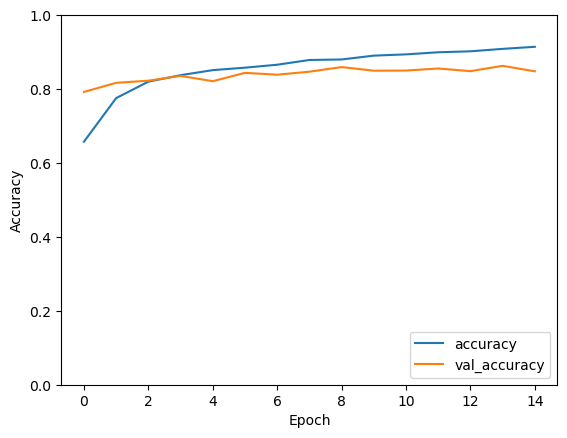

157/157 - 1s - loss: 0.4573 - accuracy: 0.8480 - 580ms/epoch - 4ms/step

Test accuracy: 0.8479999899864197
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 84.8 %

Confusion matrix for test data
------------------------------------------------------------
[[805   2  11  29 153]
 [  9 967   1  19   4]
 [ 28   0 746  20 206]
 [ 22   4   9 913  52]
 [121   0  35  35 809]]


In [169]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third conv. layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout with 50% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # Again, dropout with 50% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
history_base4 = model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

# Visualize the training process
plt.plot(history_base4.history['accuracy'], label='accuracy')
plt.plot(history_base4.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_base4, test_acc_base4 = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_base4)

# Predict the test set
predictions_base4 = model.predict(test_images)
predicted_classes_base4 = np.argmax(predictions_base4, axis=1)
true_classes_base4 = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_base4, predicted_classes_base4) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_base4, predicted_classes_base4))


### Augmented model - added random horizontal flipping

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_107 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_95 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_108 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_96 (Bat  (None, 11, 11, 64)       256       
 chNormalization)                                                
                                                     

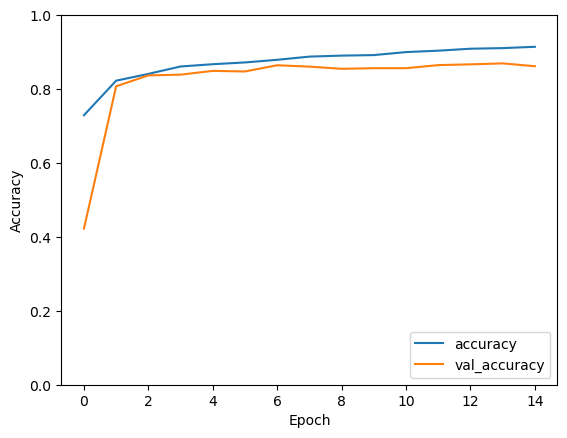

157/157 - 1s - loss: 0.3888 - accuracy: 0.8618 - 597ms/epoch - 4ms/step

Test accuracy: 0.8618000149726868
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 86.18 %

Confusion matrix for test data
------------------------------------------------------------
[[863   0  24  12 101]
 [  5 960   4  24   7]
 [ 19   0 838  15 128]
 [ 23   0  19 906  52]
 [153   0  72  33 742]]


In [170]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third conv. layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.25)) # Dropout with 25% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25)) # Again, dropout with 25% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,  # Horizontal flipping
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=32, shuffle=False)

# Fit the model using the generator
history_aug = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,  # Number of steps per epoch
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 32  # Number of steps for validation
)

# Visualize the training process (accuracy)
plt.plot(history_aug.history['accuracy'], label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_aug, test_acc_aug = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc_aug)

# Predict the test set
predictions_aug = model.predict(validation_generator)
predicted_classes_aug = np.argmax(predictions_aug, axis=1)
true_classes_aug = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_aug, predicted_classes_aug) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_aug, predicted_classes_aug))


### Augmented model 2 - added random rotations

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_110 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_98 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_111 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_99 (Bat  (None, 11, 11, 64)       256       
 chNormalization)                                                
                                                     

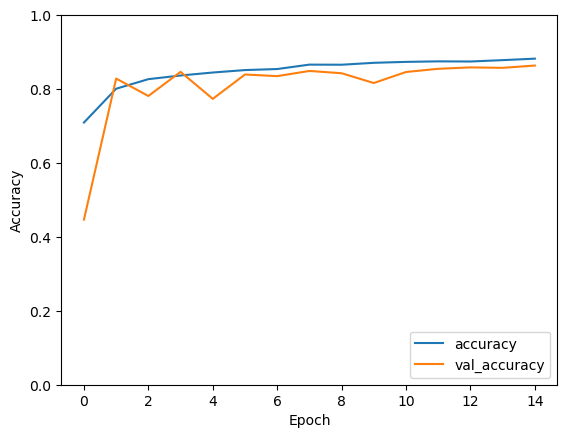

157/157 - 1s - loss: 0.3862 - accuracy: 0.8634 - 640ms/epoch - 4ms/step

Test accuracy: 0.8633999824523926
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 86.33999999999999 %

Confusion matrix for test data
------------------------------------------------------------
[[822   2  19  14 143]
 [  4 975   2  13   6]
 [ 18   1 801  15 165]
 [ 30   7  18 899  46]
 [108   2  46  24 820]]


In [171]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third conv. layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.25)) # Dropout with 25% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25)) # Again, dropout with 25% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Random rotations between 0 and 10 degrees
    horizontal_flip=True,  # Horizontal flipping
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=32, shuffle=False)

# Fit the model using the generator
history_aug2 = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,  # Number of steps per epoch
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 32  # Number of steps for validation
)

# Visualize the training process (accuracy)
plt.plot(history_aug2.history['accuracy'], label='accuracy')
plt.plot(history_aug2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_aug2, test_acc_aug2 = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc_aug2)

# Predict the test set
predictions_aug2 = model.predict(validation_generator)
predicted_classes_aug2 = np.argmax(predictions_aug2, axis=1)
true_classes_aug2 = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_aug2, predicted_classes_aug2) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_aug2, predicted_classes_aug2))


### Augmented model 3 - added random zooming in

Model: "sequential_43"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_101 (Ba  (None, 26, 26, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_113 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_114 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_102 (Ba  (None, 11, 11, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooli

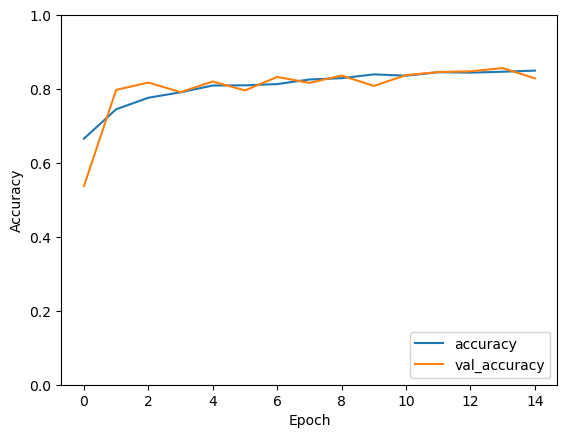

157/157 - 1s - loss: 0.4730 - accuracy: 0.8288 - 764ms/epoch - 5ms/step

Test accuracy: 0.8288000226020813
157/157 [==============================] - 1s 5ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 82.88 %

Confusion matrix for test data
------------------------------------------------------------
[[868   2  41   3  86]
 [  9 969   8   9   5]
 [ 11   0 896   1  92]
 [ 99  12  61 725 103]
 [164   0 141   9 686]]


In [172]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third conv. layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.25)) # Dropout with 25% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25)) # Again, dropout with 25% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Random rotations between 0 and 10 degrees
    zoom_range=0.2,  # Zooming
    horizontal_flip=True,  # Horizontal flipping
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=32, shuffle=False)

# Fit the model using the generator
history_aug3 = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,  # Number of steps per epoch
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 32  # Number of steps for validation
)

# Visualize the training process (accuracy)
plt.plot(history_aug3.history['accuracy'], label='accuracy')
plt.plot(history_aug3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_aug3, test_acc_aug3 = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:', test_acc_aug3)

# Predict the test set
predictions_aug3 = model.predict(validation_generator)
predicted_classes_aug3 = np.argmax(predictions_aug3, axis=1)
true_classes_aug3 = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_aug3, predicted_classes_aug3) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_aug3, predicted_classes_aug3))



### Augmented model 4 (final) - added shearing

Shearing is basically skewing along a particular axis. For example, with horizontal shearing, a pair of trousers would be skewed to the left or right, making them appear as if they're leaning in that direction. This could simulate the appearance of trousers as they might look in a real-world scenario where they are not laid out perfectly flat.

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_116 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_104 (Ba  (None, 26, 26, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_117 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_105 (Ba  (None, 11, 11, 64)       256       
 tchNormalization)                                               
                                                     

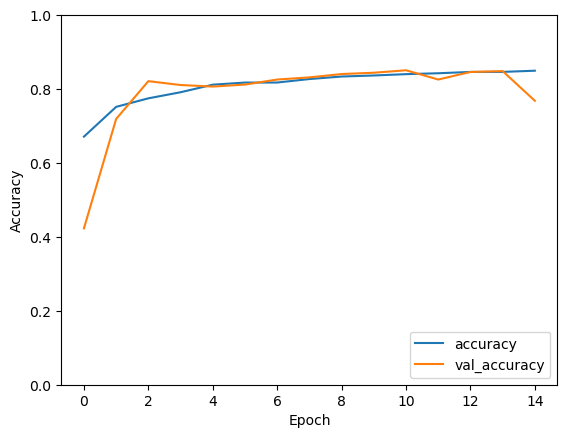

157/157 - 1s - loss: 70.5657 - accuracy: 0.6482 - 657ms/epoch - 4ms/step

Test accuracy: 0.6481999754905701
157/157 [==============================] - 1s 4ms/step
Accuracy score for test data
------------------------------------------------------------
Acc: 76.8 %

Confusion matrix for test data
------------------------------------------------------------
[[618   0  27  10 345]
 [  0 970   2   8  20]
 [  6   0 568   4 422]
 [ 18  13  22 791 156]
 [ 58   0  37  12 893]]


In [173]:
# Define the model
model = models.Sequential()

# First conv. layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second conv. layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third conv. layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())
model.add(layers.Dropout(0.25)) # Dropout with 25% chance

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25)) # Again, dropout with 25% chance
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Random rotations between 0 and 10 degrees
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zooming
    horizontal_flip=True,  # Horizontal flipping
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=32, shuffle=False)

# Fit the model using the generator
history_aug_final = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,  # Number of steps per epoch
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(test_images) // 32  # Number of steps for validation
)

# Visualize the training process (accuracy)
plt.plot(history_aug_final.history['accuracy'], label='accuracy')
plt.plot(history_aug_final.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test data
test_loss_aug_final, test_acc_aug_final = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc_aug_final)

# Predict the test set
predictions_aug_final = model.predict(validation_generator)
predicted_classes_aug_final = np.argmax(predictions_aug_final, axis=1)
true_classes_aug_final = np.argmax(test_labels, axis=1)

# Print accuracy score and confusion matrix
print("Accuracy score for test data")
print("-"*60)
print(f"Acc: {accuracy_score(true_classes_aug_final, predicted_classes_aug_final) * 100} %")
print()
print("Confusion matrix for test data")
print("-"*60)
print(confusion_matrix(true_classes_aug_final, predicted_classes_aug_final))



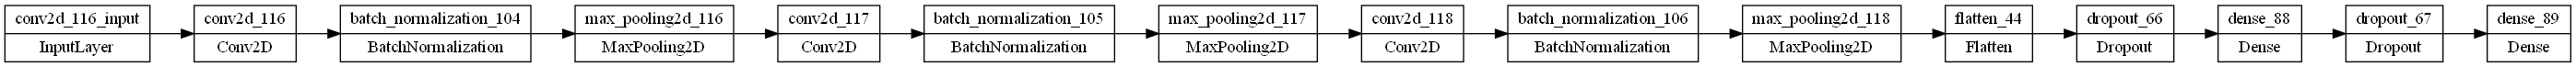

In [174]:
# The backbones of the final CNN model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

## Comparison of all classfication models

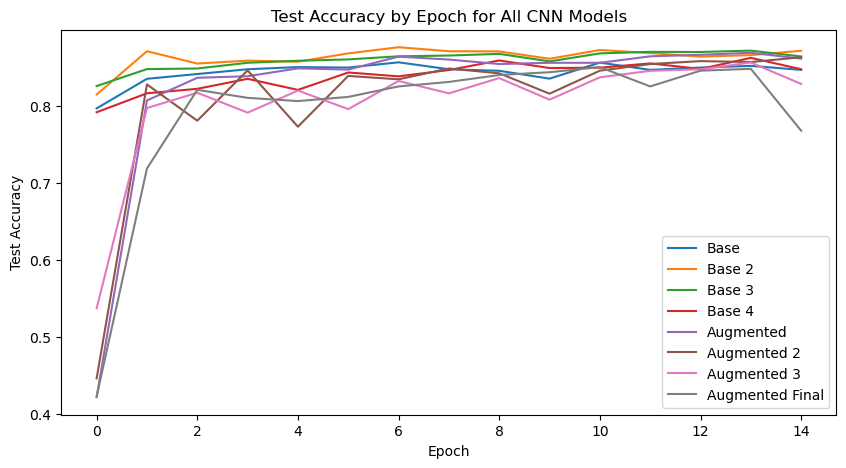

In [175]:
# Define the model names and their corresponding history objects
model_names = ['Base', 'Base 2', 'Base 3', 'Base 4', 'Augmented', 'Augmented 2', 'Augmented 3', 'Augmented Final']
history_objects = [history_base, history_base2, history_base3, history_base4, history_aug, history_aug2, history_aug3, history_aug_final]

# Colors for each of the models
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Plot the test accuracy for each model
plt.figure(figsize=(10, 5))
for model_name, history_obj in zip(model_names, history_objects):
    plt.plot(history_obj.history['val_accuracy'], label=model_name)

plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy by Epoch for All CNN Models')
plt.legend(loc='lower right')
plt.show()


In [176]:
# Accuracies of all CNN models
cnn_base_accuracy = max(history_base.history['val_accuracy']) * 100
cnn_base2_accuracy = max(history_base2.history['val_accuracy']) * 100
cnn_base3_accuracy = max(history_base3.history['val_accuracy']) * 100
cnn_base4_accuracy = max(history_base4.history['val_accuracy']) * 100
augmented_cnn_accuracy = max(history_aug.history['val_accuracy']) * 100
augmented_cnn2_accuracy = max(history_aug2.history['val_accuracy']) * 100
augmented_cnn3_accuracy = max(history_aug3.history['val_accuracy']) * 100
augmented_cnn_final_accuracy = max(history_aug_final.history['val_accuracy']) * 100
nb_accuracy1 = nb_accuracy * 100
nb_accuracy_pca1 = nb_accuracy_pca * 100
knn_accuracy1 = knn_accuracy * 100
knn_accuracy_pca1 = knn_accuracy_pca * 100
knn_accuracy_lda1 = knn_accuracy_lda * 100


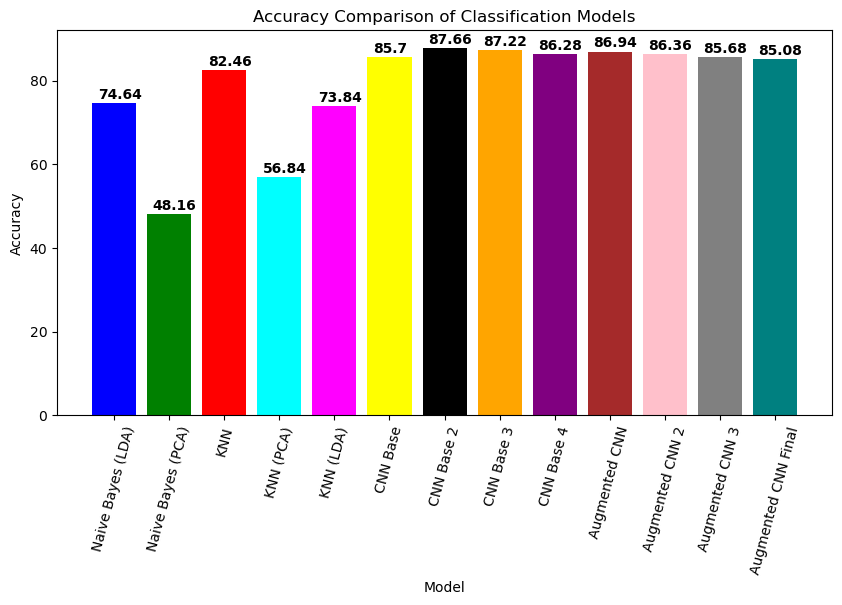

In [177]:
# Define the model names and their corresponding accuracy values
model_names = ['Naive Bayes (LDA)', 'Naive Bayes (PCA)', 'KNN', 'KNN (PCA)', 'KNN (LDA)', 'CNN Base', 'CNN Base 2', 'CNN Base 3', 'CNN Base 4', 'Augmented CNN', 'Augmented CNN 2', 'Augmented CNN 3', 'Augmented CNN Final']
accuracy_values = [nb_accuracy1, nb_accuracy_pca1, knn_accuracy1, knn_accuracy_pca1, knn_accuracy_lda1, cnn_base_accuracy, cnn_base2_accuracy, cnn_base3_accuracy, cnn_base4_accuracy, augmented_cnn_accuracy, augmented_cnn2_accuracy, augmented_cnn3_accuracy, augmented_cnn_final_accuracy]

# Colors for each of the models
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink', 'gray', 'teal']

# Plot the accuracy for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_values, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.xticks(rotation=75)
for i, v in enumerate(accuracy_values):
    plt.text(i - 0.3, v + 1, str(round(v, 2)), color='black', fontweight='bold')
plt.show()
